In [9]:
# Import Tensor Flow
import tensorflow as tf

# from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop

# Import Dependencies
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
sns.set(style="darkgrid")

In [10]:
# Create Path Variable
PATH = 'data/'

# Join Image Data Folder to Data Path
predict_dir = os.path.join(PATH,"image_data")

In [11]:
#Create Model Parameters
batch_size = 64
epochs = 30
IMG_HEIGHT = 200
IMG_WIDTH = 200
IMG_SHAPE=(200,200,3)

In [12]:
# Generator for our prediction data
predict_image_generator = ImageDataGenerator(rescale= 1/255.0) 

In [13]:
# Link Generator to Prediction Directory
predict_im_gen = predict_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=predict_dir,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH)
                                                           )

labels = (predict_im_gen.class_indices)

Found 50 images belonging to 5 classes.


In [14]:
# Load TensorFlow Model
tensor_flow_model = tf.keras.models.load_model('models/tensorflow_model.h5')

In [15]:
# Predict Tensorflow Batch
art_fight_tensorflow = tensor_flow_model.predict_generator(predict_im_gen)

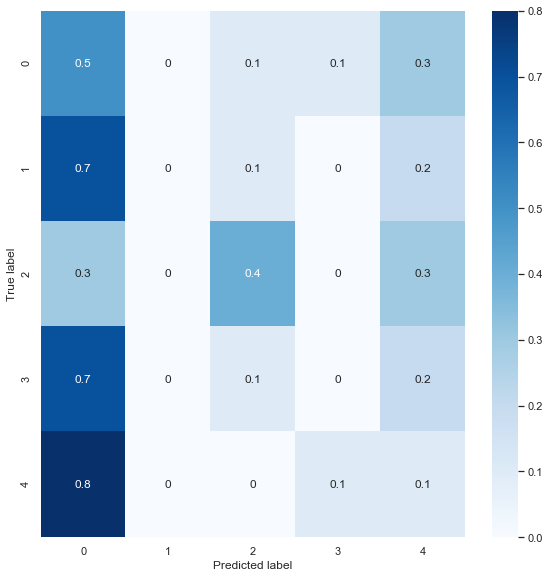

In [16]:
y_true = np.array([
[1,0,0,0,0],
[1,0,0,0,0],
[1,0,0,0,0],
[1,0,0,0,0],
[1,0,0,0,0],
[1,0,0,0,0],
[1,0,0,0,0],
[1,0,0,0,0],
[1,0,0,0,0],
[1,0,0,0,0],
[0,1,0,0,0],
[0,1,0,0,0],
[0,1,0,0,0],
[0,1,0,0,0],
[0,1,0,0,0],
[0,1,0,0,0],
[0,1,0,0,0],
[0,1,0,0,0],
[0,1,0,0,0],
[0,1,0,0,0],
[0,0,1,0,0],
[0,0,1,0,0],
[0,0,1,0,0],
[0,0,1,0,0],
[0,0,1,0,0],
[0,0,1,0,0],
[0,0,1,0,0],
[0,0,1,0,0],
[0,0,1,0,0],
[0,0,1,0,0],
[0,0,0,1,0],
[0,0,0,1,0],
[0,0,0,1,0],
[0,0,0,1,0],
[0,0,0,1,0],
[0,0,0,1,0],
[0,0,0,1,0],
[0,0,0,1,0],
[0,0,0,1,0],
[0,0,0,1,0],
[0,0,0,0,1],
[0,0,0,0,1],
[0,0,0,0,1],
[0,0,0,0,1],
[0,0,0,0,1],
[0,0,0,0,1],
[0,0,0,0,1],
[0,0,0,0,1],
[0,0,0,0,1],
[0,0,0,0,1]
])

y_pred = (art_fight_tensorflow> .5)

confusion_matrix = confusion_matrix(y_true.argmax(axis=1), y_pred.argmax(axis=1), normalize="true")

con_mat_df = pd.DataFrame(confusion_matrix)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


